<font size=6  color= 'white' > <b>[LEPL1507] - PROJET P4</b> <br>
<br><br>
Airson Alexis<br>
Beniffou Ibrahim <br>
Henneaux Lucas <br>
Lemaire Antoine <br>
Smith Marielle <br>
Canon Théo<br>
<div style="text-align: right"> </div>

<br><br>
</font>


This is the version maintaining the essential parts of code to run

Easier to add new features 


<font size=6  color= 'white' > <b> Phase 1 : retrieving data </b> <br>

The aim of this first part is to get arrays of images 

In [1]:
# CELL 1.1 : accessing to data 
# Needs [ CELL 0 : import ]

# defines variables 

#-----------------------------------------------------------------------------

path_training = 'Retrieving_data\BelgiumTSC_Training\Training'
path_testing = 'Retrieving_data\BelgiumTSC_Testing\Testing'

nbr_class = 62 # len(next(walk(path_training))[1])  counting the number of classes 
print('number of classes : ', nbr_class)

#-----------------------------------------------------------------------------

# resol is the format for the images that we want for convenience

resol = (50,50) # Square image only ! 
print("Resolution of images : ", resol)

number of classes :  62
Resolution of images :  (50, 50)


In [2]:
from Retrieving_data.retrieving_data import accessing

# These are iterators 
# See fct accessing in codes of Phase 1 
training_set = accessing(path_training, resol)
test_set = accessing(path_testing, resol) 

number of images in the folder :  4575
Found 4575 images belonging to 62 classes.
number of images in the folder :  2520
Found 2520 images belonging to 62 classes.


In [3]:
from Retrieving_data.retrieving_data import store

# These are arrays
# See fct store in codes of Phase 1 
X_train, y_train = store(training_set)
X_test, y_test = store(test_set)

Shape of X :  (4575, 50, 50, 3)
Shape of y :  (4575,)
Shape of X :  (2520, 50, 50, 3)
Shape of y :  (2520,)


<font size=6  color= 'white' > <b> Phase 2 : visualisation of the dataset </b> <br>

The aim of this part is to visualise the initial datasets 

In [4]:
from Visualisation.Visu import number

initial_nbr_train = number(nbr_class, y_train.copy())
initial_nbr_test = number(nbr_class, y_test.copy())

Number of each sign in the set : 

[ 15 110  13  15  15  11  18 157  27  18  21   7  18  90  43   9   9  79
  81 231  42  43 375  15  48  42   6  18 125  33  37  63 316  12  46  60
  18  98 285 196 242 148  35  30  48  74  44 147  11  12  15  27  27 199
 118  12  95  78  15  42   9 282]

Total of signs :  4575

Number of each sign in the set : 

[  6  27   7   6  12   3   6  90  12   0  28   0   3  39  15   0  12 183
 122 163   3  45  61  15  13   3   0   9  51  28  37  86 422   0   9 154
   0  31 213  99  48  11   9   6   3  84   6  31   0   3   0   3   0  24
  48  15  33  41   9  17  11 105]

Total of signs :  2520



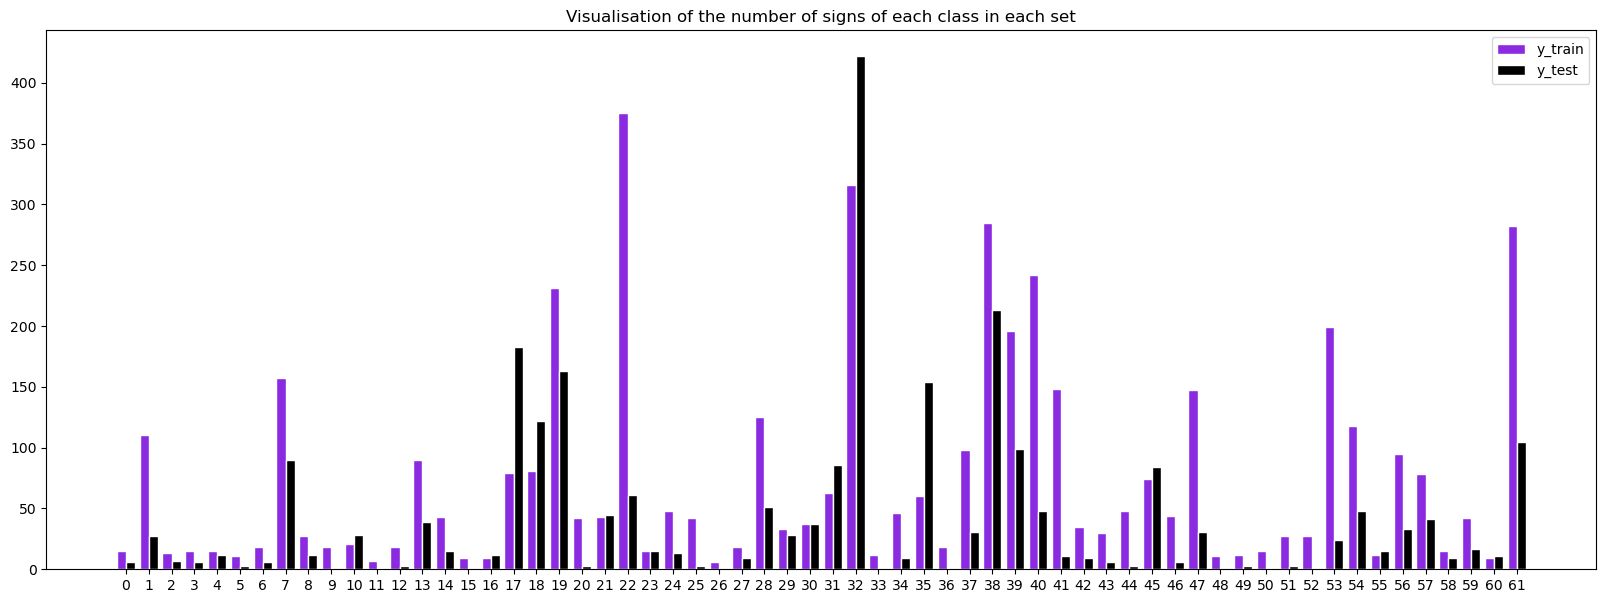

In [5]:
from Visualisation.Visu import graphs

graphs(nbr_class, y_train.copy(), y_test.copy(), 'y_train', 'y_test')

<font size=6  color= 'white' > <b> Phase 3 : augmentation of the dataset </b> <br>

The aim of this part is to change the sizes of the initial datasets


In [6]:
from augmentation.aug import first 

X_train_first, y_train_first = first(nbr_class, initial_nbr_train.copy(), initial_nbr_test.copy(), X_train.copy(), y_train.copy(), resol)

Shape of the augmented training set with first method :  (4699, 50, 50, 3)
Shape of the augmented training target with first method :  (4699,)


Number of each sign in the set : 

[ 15 110  13  15  15  11  18 157  27  18  21   7  18  90  43   9   9 137
  91 231  42  43 375  15  48  42   6  18 125  33  37  64 316  12  46 115
  18  98 285 196 242 148  35  30  48  74  44 147  11  12  15  27  27 199
 118  12  95  78  15  42   9 282]

Total of signs :  4699



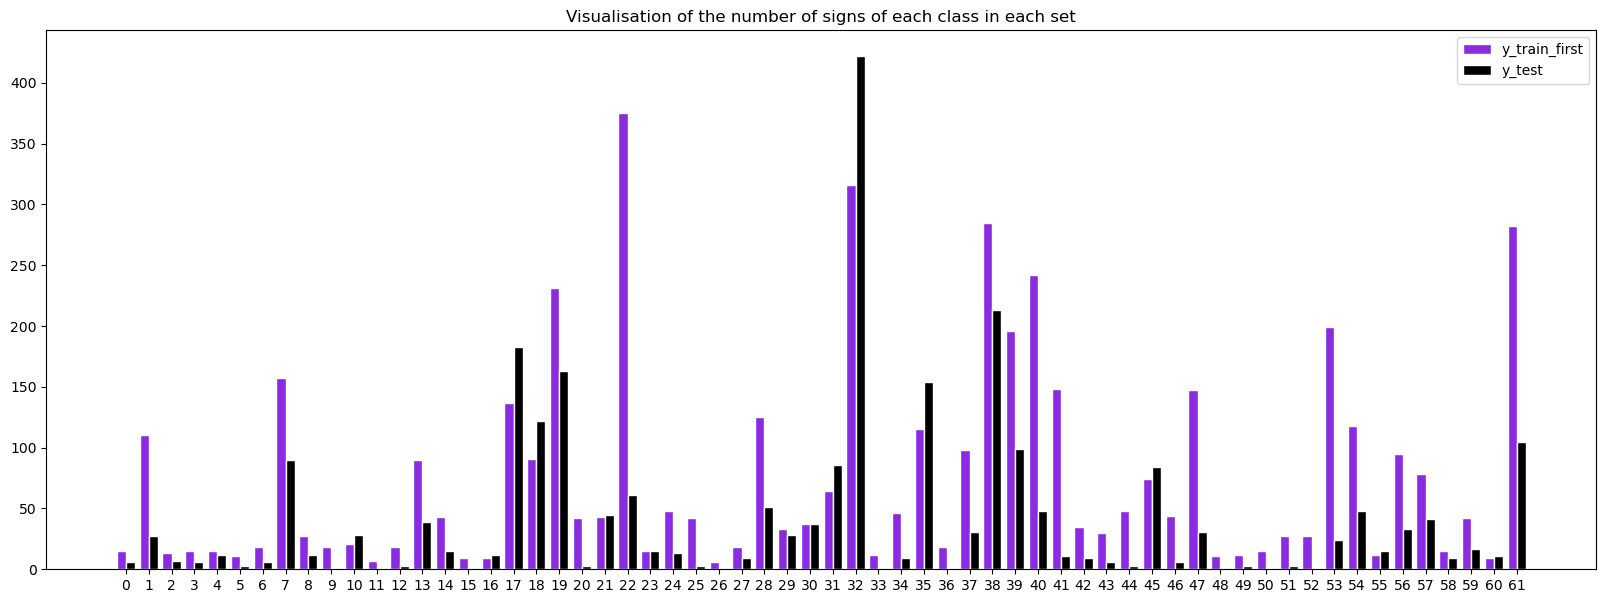

In [7]:
from Visualisation.Visu import graphs, number

nbr_train_first = number(nbr_class, y_train_first)
graphs(nbr_class, y_train_first.copy(), y_test.copy(), 'y_train_first', 'y_test')

In [8]:
from augmentation.aug import second 

X_train_second, y_train_second = second(nbr_class, initial_nbr_train.copy(), X_train.copy(), y_train.copy(), resol, max(initial_nbr_train))

Shape of the augmented training set with second method :  (23250, 50, 50, 3)
Shape of the augmented training target with second method :  (23250,)


Number of each sign in the set : 

[375 375 375 375 375 375 375 375 375 375 375 375 375 375 375 375 375 375
 375 375 375 375 375 375 375 375 375 375 375 375 375 375 375 375 375 375
 375 375 375 375 375 375 375 375 375 375 375 375 375 375 375 375 375 375
 375 375 375 375 375 375 375 375]

Total of signs :  23250



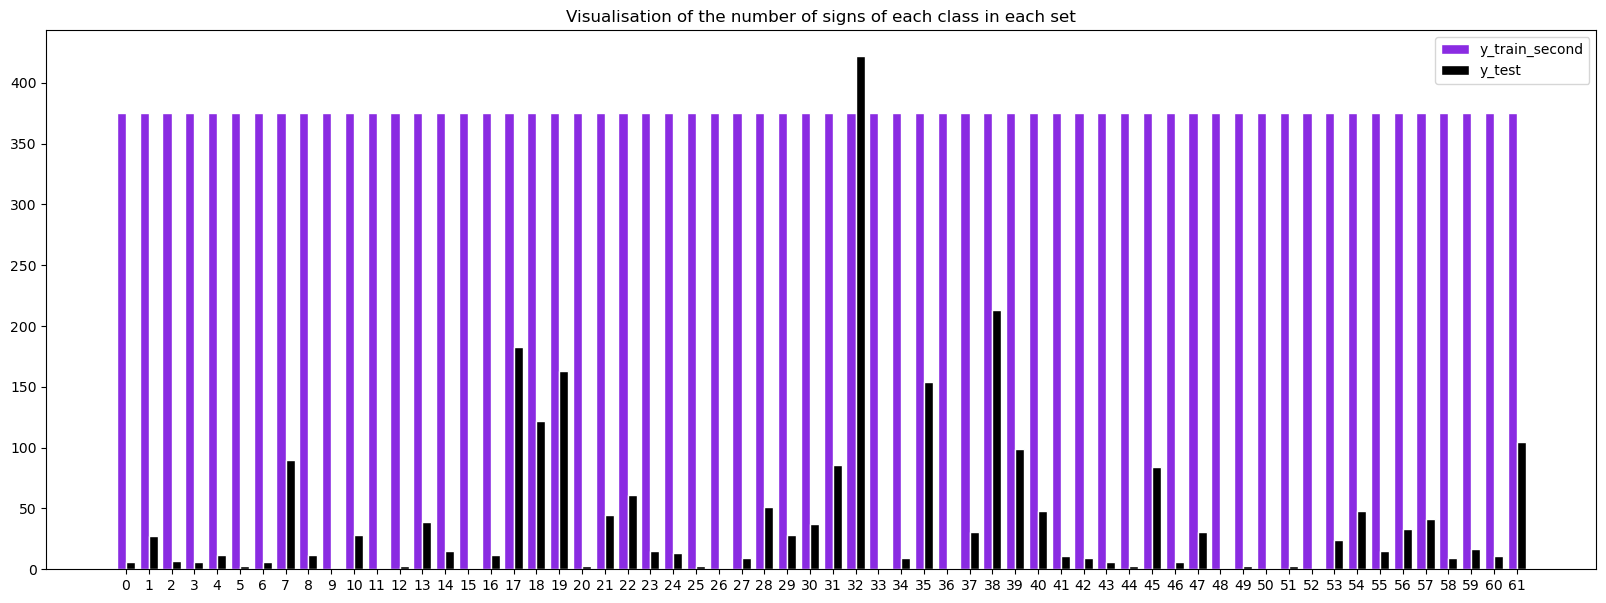

In [9]:
from Visualisation.Visu import graphs, number

nbr_train_second = number(nbr_class, y_train_second)
graphs(nbr_class, y_train_second.copy(), y_test.copy(), 'y_train_second', 'y_test')

In [10]:
from keras.utils import to_categorical

# We put our results to categorical 

#-----------------------------------------------------------------------------

y_test_tc = to_categorical(y_test.copy(), nbr_class)
y_train_tc = to_categorical(y_train.copy(), nbr_class)

print("Shape of y_train without augmentation : ", y_train_tc.shape)
print("Shape of y_test without augmentation : ", y_test_tc.shape)

#-----------------------------------------------------------------------------

y_train_first_tc = to_categorical(y_train_first, nbr_class)


print("Shape of y_train with first method : ", y_train_first_tc.shape)
print("Shape of y_test with first method : ", y_test_tc.shape)

#-----------------------------------------------------------------------------

y_train_second_tc = to_categorical(y_train_second, nbr_class)

print("Shape of y_train with second method : ", y_train_second_tc.shape)
print("Shape of y_test with second method : ", y_test_tc.shape)

Shape of y_train without augmentation :  (4575, 62)
Shape of y_test without augmentation :  (2520, 62)
Shape of y_train with first method :  (4699, 62)
Shape of y_test with first method :  (2520, 62)
Shape of y_train with second method :  (23250, 62)
Shape of y_test with second method :  (2520, 62)


<font size=6  color= 'white' > <b> Phase 4 : randomization of the dataset </b> <br>

The aim of this part is to avoid overfitting by applying transformations on the images 

In [11]:
from keras import Sequential
from keras.layers import RandomZoom, RandomRotation
from tensorflow import get_logger

# This cell is about data augmentation 
# We'll randomize our set and do our augmentation with this (cells later)
# We choose to work with the second method of augmentation  

#-----------------------------------------------------------------------------

get_logger().setLevel('ERROR')

data_augmentation = Sequential() 

data_augmentation.add(RandomZoom(0.05))
data_augmentation.add(RandomRotation(0.05)) 

#-----------------------------------------------------------------------------

# We apply the augmentation on our datasets 
augmented_image_train = data_augmentation(X_train_second.copy())

#-----------------------------------------------------------------------------

print("Shape of the randomized training set : ", augmented_image_train.shape)

Shape of the randomized training set :  (23250, 50, 50, 3)


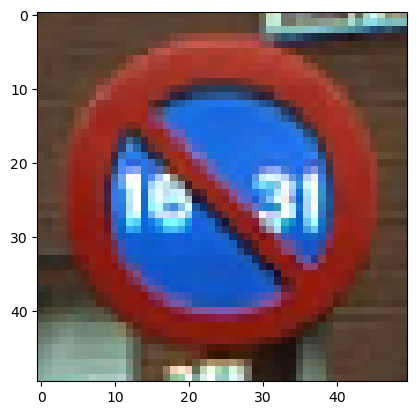

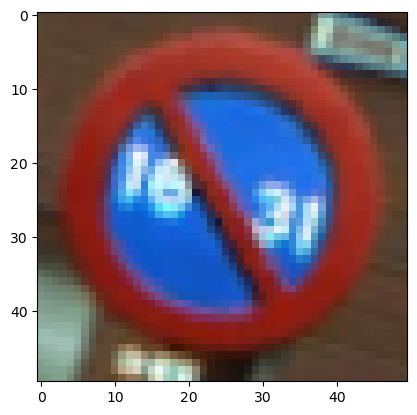

In [12]:
from random import randint 
from matplotlib.pyplot import figure, imshow

# A little test to see the result of the augmentation 

#-----------------------------------------------------------------------------

index = randint(0,len(X_train_second))
figure()
imshow(X_train_second[index])
figure()
imshow(augmented_image_train[index])

<font size=6  color= 'white' > <b> Phase 5 : Construction of the model </b> <br>

The aim of this part is to construct a model using CNN

You can find an optimizer for hyperparameters with the codes of this part

In [13]:
from Model.model import construct_model

model_simple = construct_model(nbr_class, X_train.copy())

model_first = construct_model(nbr_class, X_train_first.copy())

model_second = construct_model(nbr_class, X_train_second.copy())

model_second.summary() # Same model so same parameters for the 3 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 45, 45, 112)       12208     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 112)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 112)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 208)       209872    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 208)        0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 4, 4, 208)        

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# We train here the model with the first method of augmentation 

eps = 3 # The number of time we want the model to train on the entire training_set

#-----------------------------------------------------------------------------

mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

#-----------------------------------------------------------------------------

validation_X = X_test.copy()
validation_y = y_test_tc.copy()

#-----------------------------------------------------------------------------

anc_second = model_second.fit(X_train_second, y_train_second_tc,validation_data=(validation_X,validation_y), epochs=eps, callbacks=mycallbacks)

#-----------------------------------------------------------------------------

#added aug.flow to (X_train, y_train) to do data augmentation
# validation_data=(X_test_new_first, y_test_new_first)
# validation_data=(X_test, y_test)

# talk : aug.flow ? 
# talk : validation data strange 

Epoch 1/3
727/727 [==============================] - 176s 219ms/step - loss: 2.0089 - accuracy: 0.4549 - val_loss: 0.4773 - val_accuracy: 0.8583
Epoch 2/3
727/727 [==============================] - 165s 227ms/step - loss: 0.2595 - accuracy: 0.9225 - val_loss: 0.2292 - val_accuracy: 0.9532
Epoch 3/3
727/727 [==============================] - 158s 218ms/step - loss: 0.1266 - accuracy: 0.9641 - val_loss: 0.2201 - val_accuracy: 0.9560


<font size=6  color= 'white' > <b> Phase 6 : Analysis of performances </b> <br>

The aim of this part is to analyse the results of the model based on the testing set available 

In [15]:
label_names = open("dict.csv").read().strip().split("\n")[0:]
label_names = [l.split(",")[1] for l in label_names]

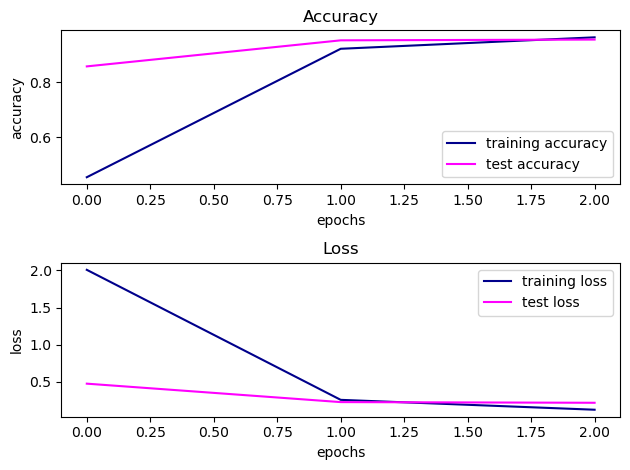

In [16]:
from Performances.perf import perf 

perf(anc_second)

In [17]:
from Performances.perf import ratio_kaggle

ratio_kaggle(y_test_tc, X_test, model_second)

True codes :  [19  1 61 ... 38 32 60]
Number of true codes :  2520
79/79 [==============================] - 4s 54ms/step
Predictions :  [19  1 61 ... 38 32 60]
Number of predictions :  2520
Number of right :  2409
Number of elements :  2520
Ratio :  0.955952380952381


In [18]:
from Performances.perf import network

from warnings import filterwarnings

filterwarnings('ignore')

network(model_second, y_test_tc, X_test, label_names, nbr_class)

[INFO] evaluating network...
79/79 [==============================] - 5s 60ms/step
                                 precision    recall  f1-score   support

               "uneven_surface"       1.00      1.00      1.00         6
                         "bump"       0.90      1.00      0.95        27
                     "slippery"       1.00      0.71      0.83         7
                   "left_curve"       0.60      0.50      0.55         6
                  "right_curve"       1.00      0.92      0.96        12
                  "left_curves"       1.00      0.67      0.80         3
                 "right_curves"       0.75      1.00      0.86         6
                     "children"       0.96      1.00      0.98        90
                      "cyclist"       0.75      1.00      0.86        12
                      "animals"       0.00      0.00      0.00         0
                    "roadworks"       0.96      0.79      0.86        28
              "traffic_signals"       0.

<font size=6  color= 'white' > <b> Phase 7 : Visualisation of the first kaggle challenge </b> <br>

The aim of this part is to visualise the dataset of the first challenge 

In [19]:
from Visualisation.Visu import to_jpeg

folder_dir = "challenge_1/eval_kaggle1"
to_jpeg(folder_dir)

<font size=6  color= 'white' > <b> Phase 8 : Generating csv for kaggle </b> <br>

The aim of this part is to predict on the kaggle dataset and generate a csv 

In [21]:
from os import listdir
from numpy import asarray, append, array
from PIL import Image

# We store all of the images from the kaggle folder in an array 
# recall that target has been defined above 

images = [] 
names = []

# get the path/directory
folder_dir = 'challenge_1/eval_kaggle1'

for image in listdir(folder_dir):
    # check if the image ends with ppm
    if (image.endswith(".ppm")):
        img = Image.open(folder_dir + '/' + image)
        img = img.resize(resol) # (30,30) as an example 
        img = asarray(img)
        images.append(img) 
        names.append(image.replace('.ppm',''))

images = array(images)

print("Number of images and their resolution in the kaggle dataset : ", images.shape)

Number of images and their resolution in the kaggle dataset :  (202, 50, 50, 3)


In [22]:
from csv import DictReader

# We will store the data in dict.csv in a dict 

data = {}

with open('dict.csv', 'r') as f:
    d_reader = DictReader(f, fieldnames=["num", "sign"])

    #get fieldnames from DictReader object and store in list
    for row in d_reader:
        data[row['num']] = row['sign']

7/7 [==============================] - 1s 41ms/step


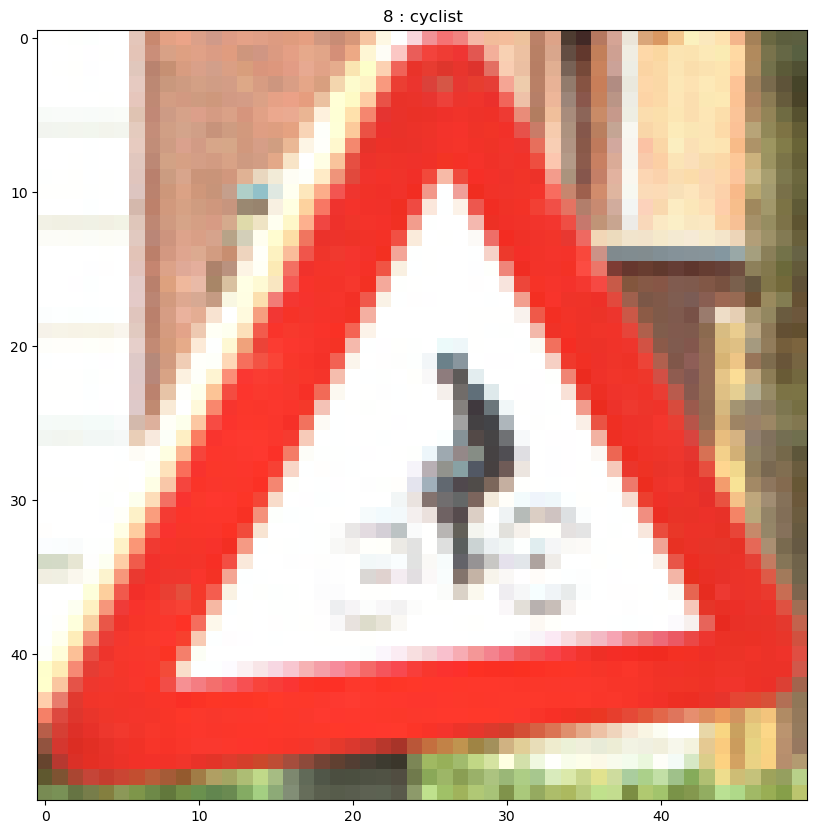

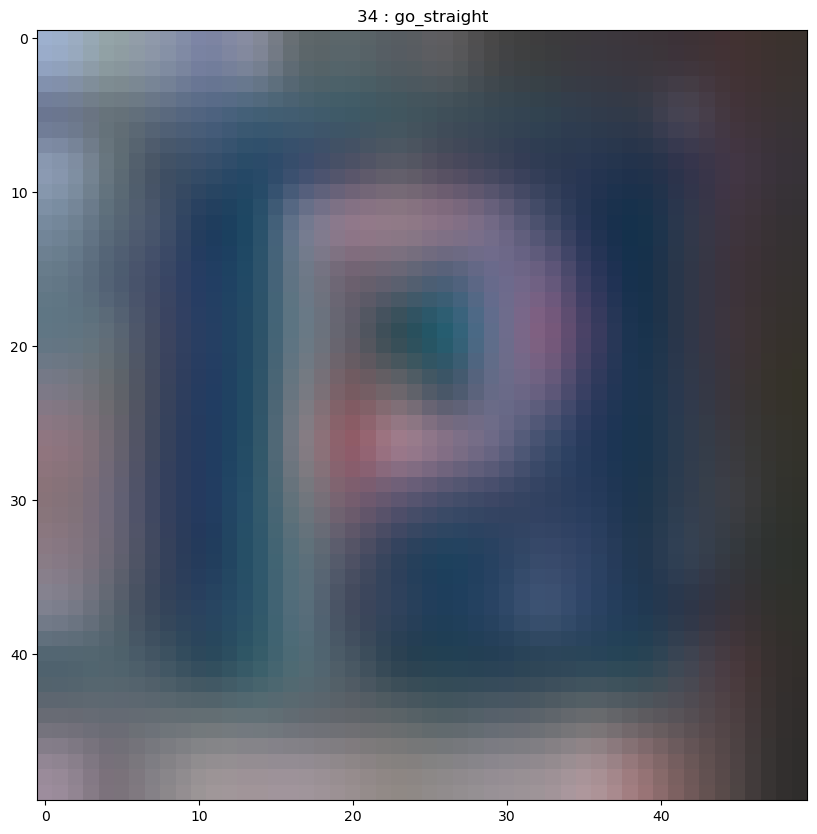

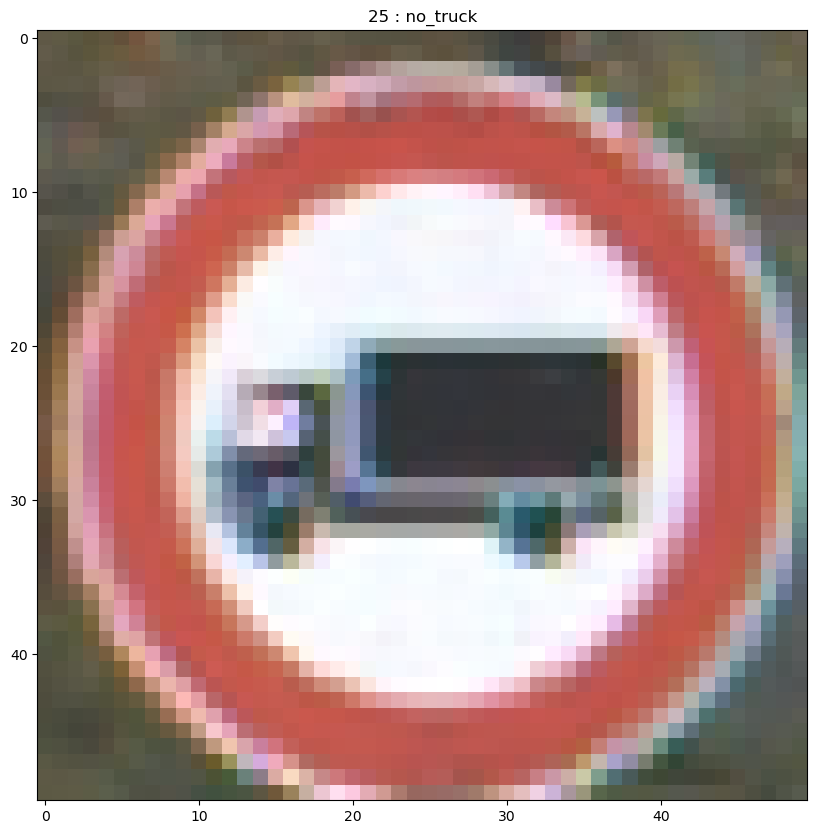

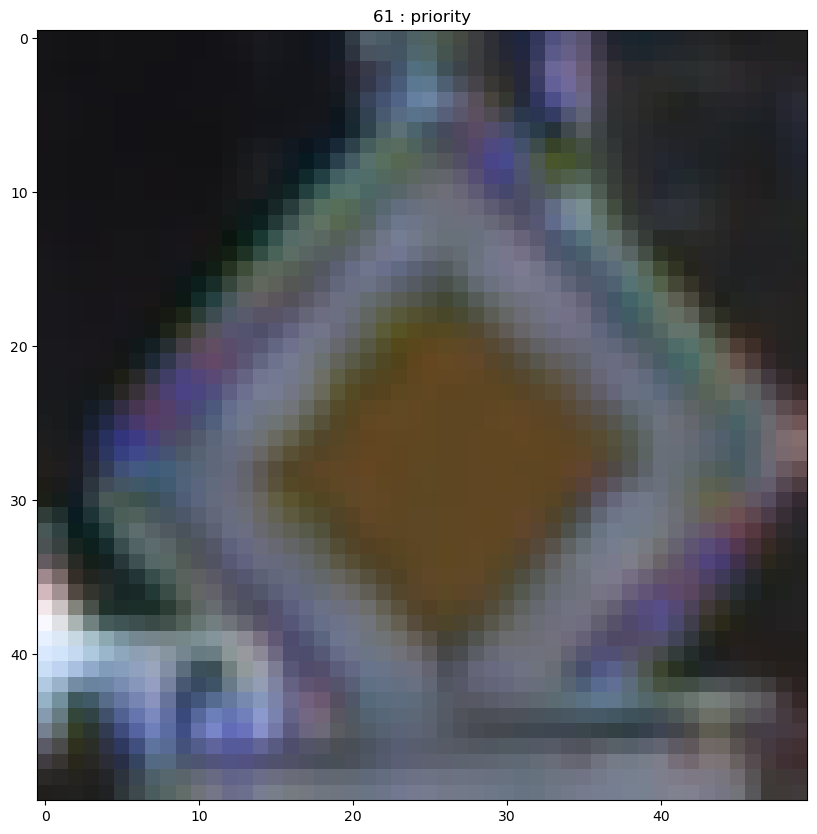

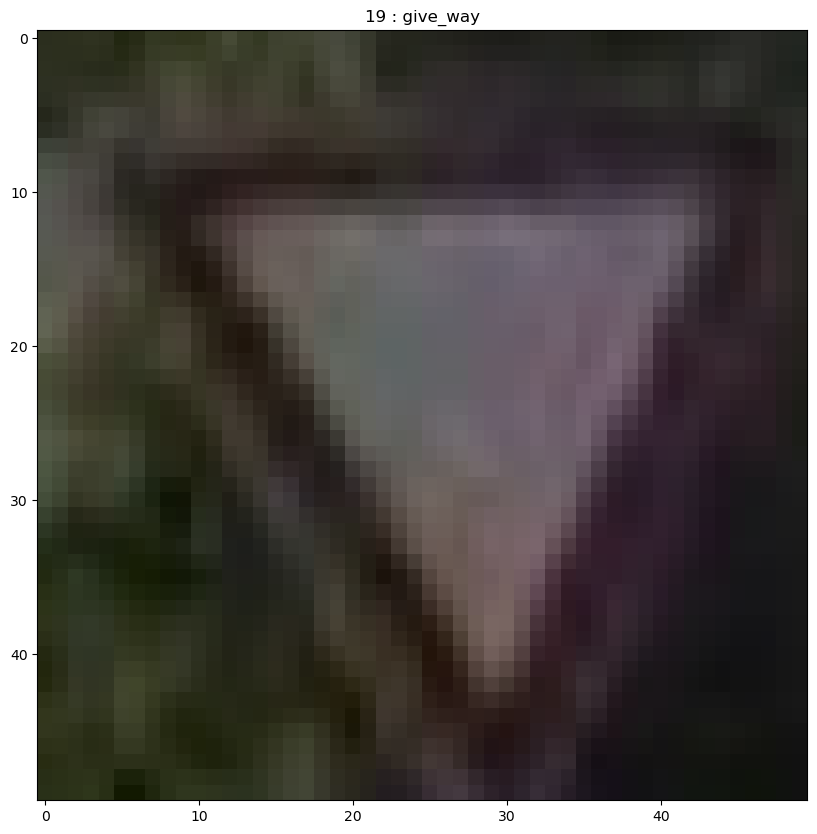

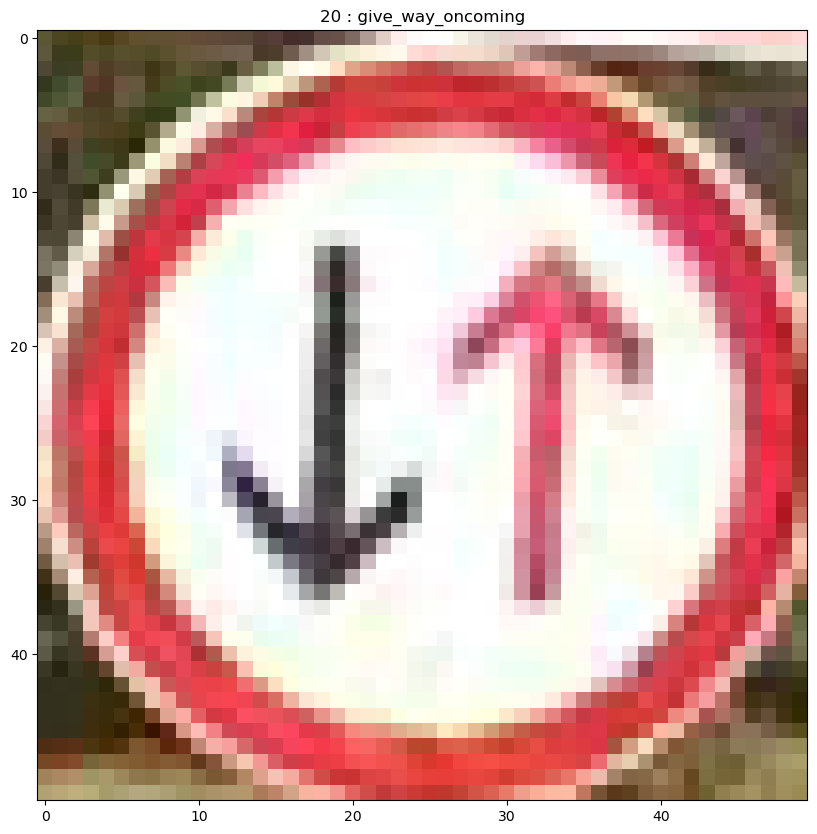

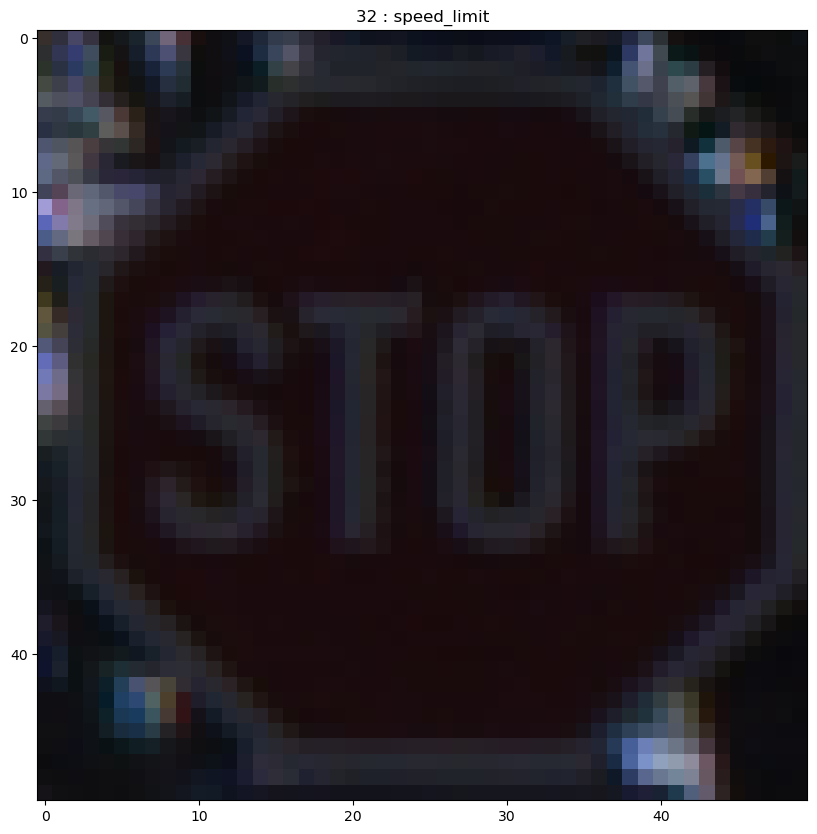

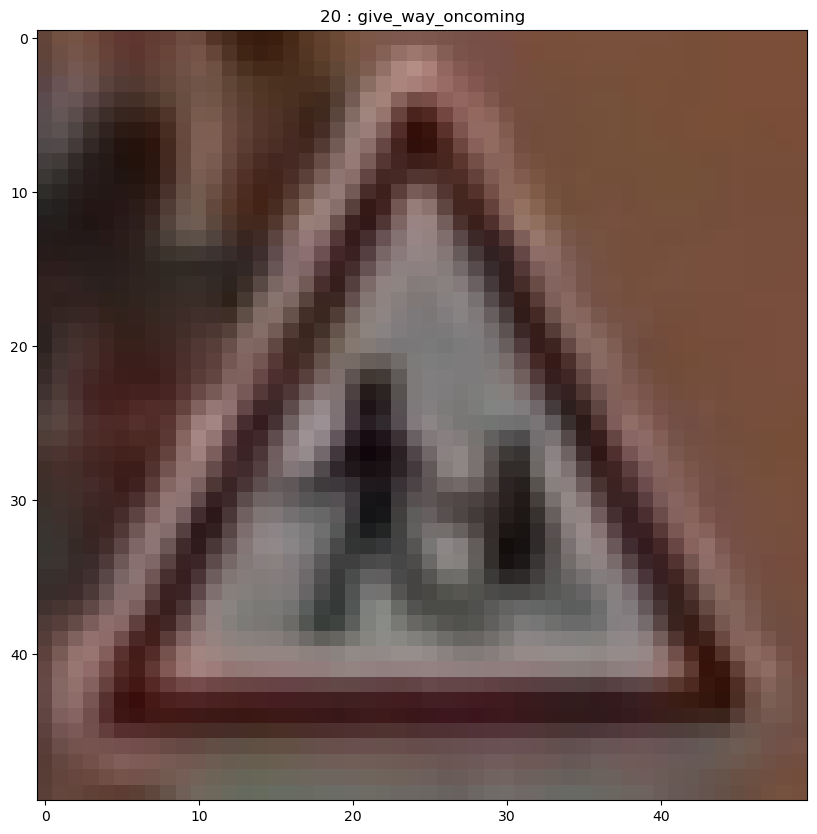

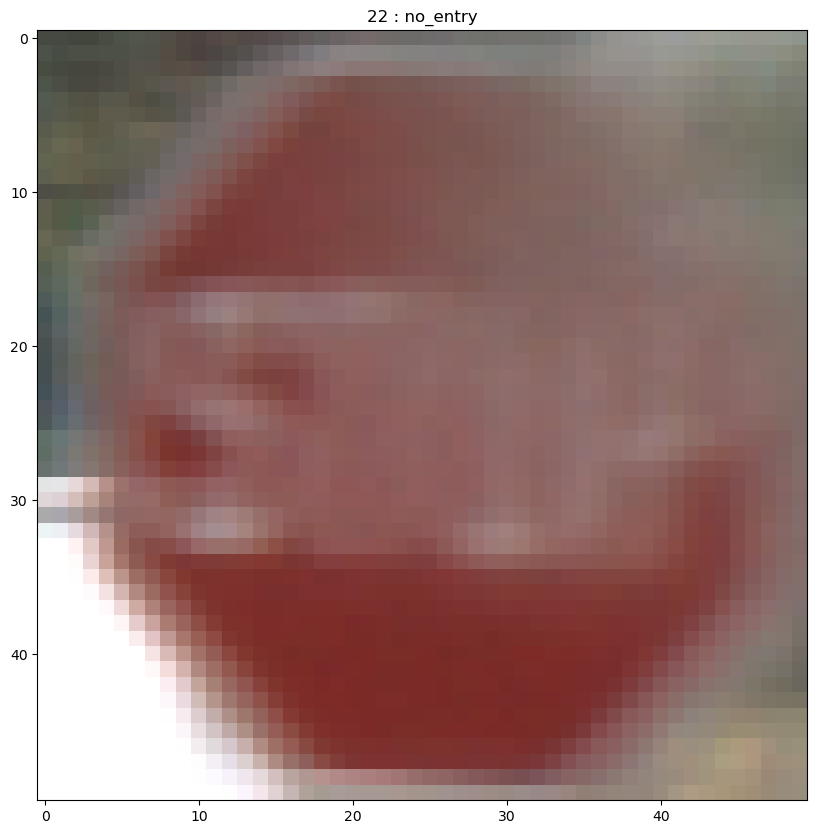

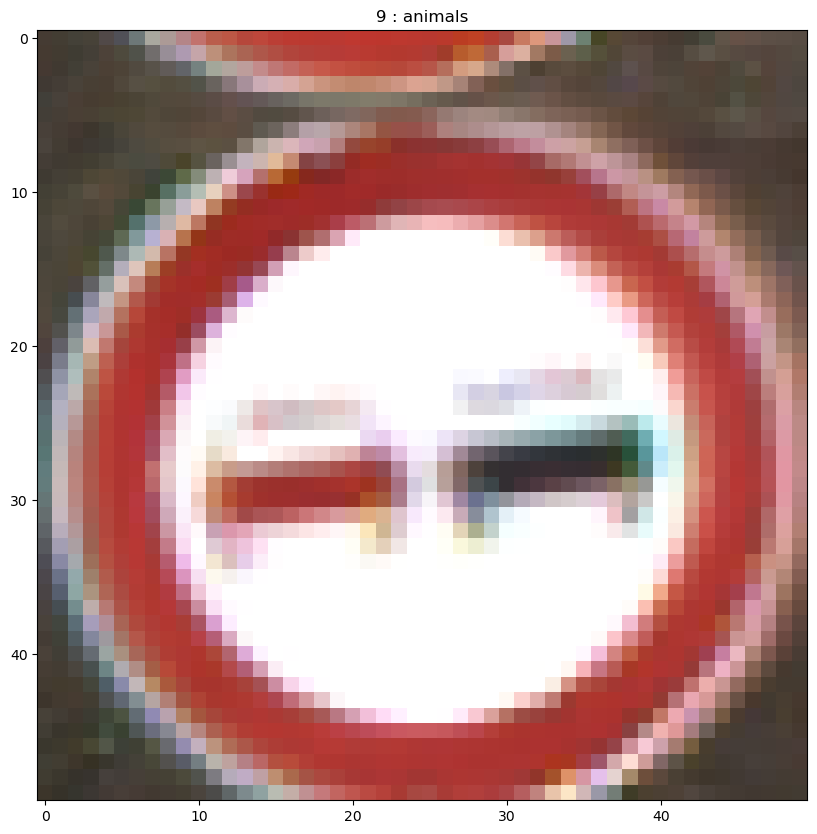

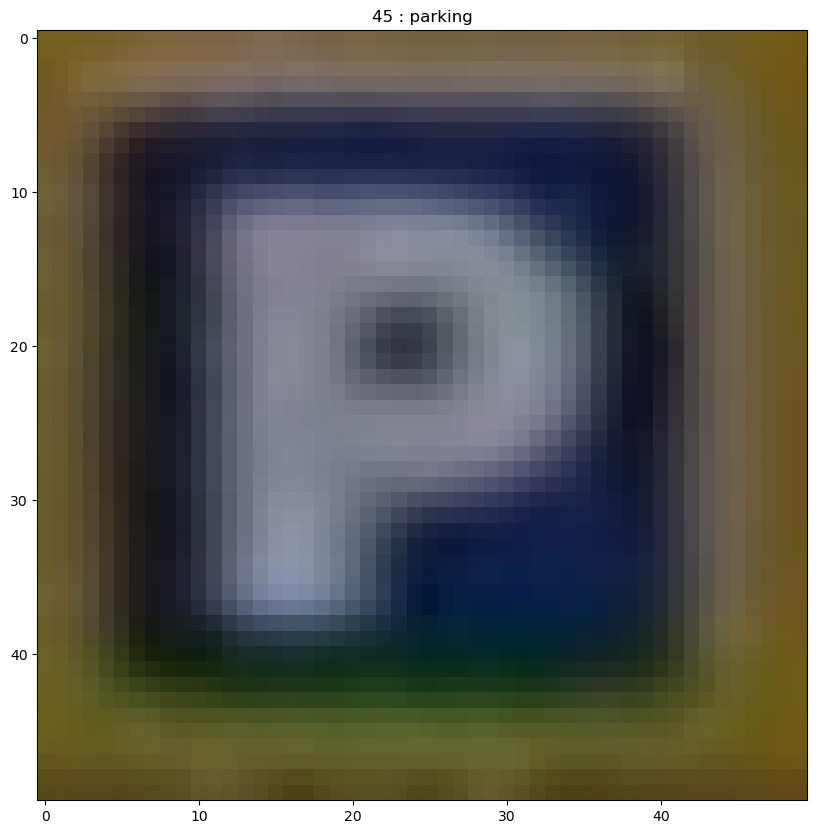

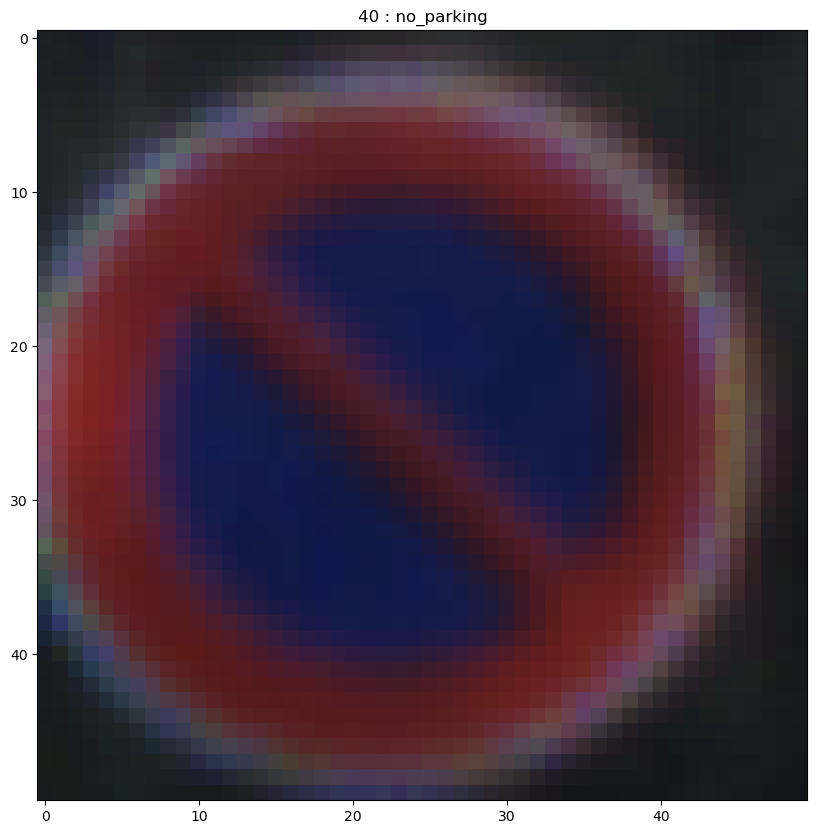

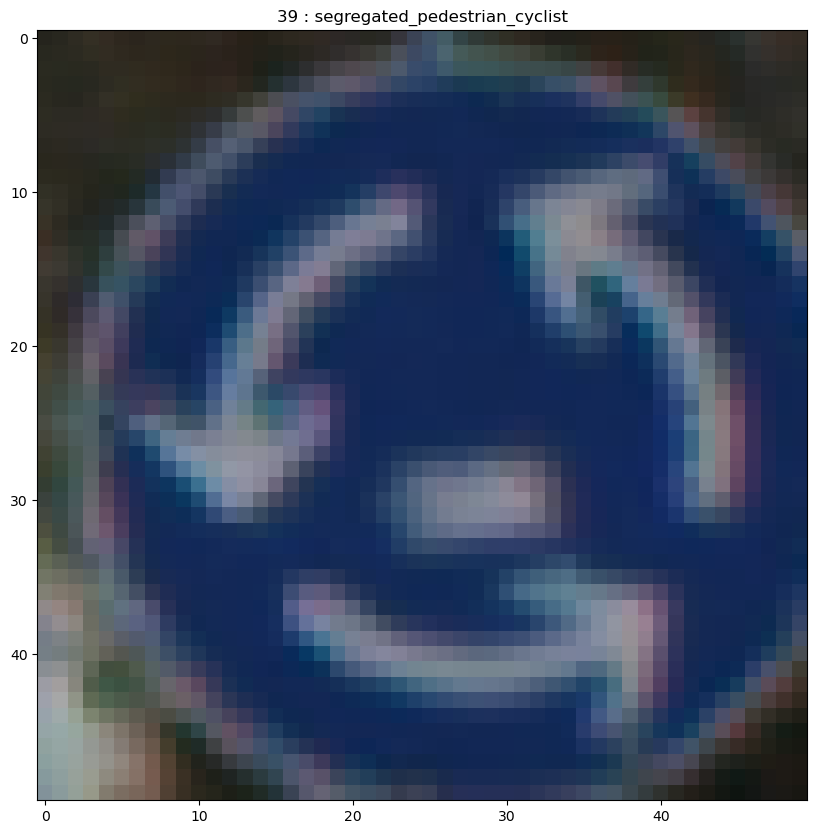

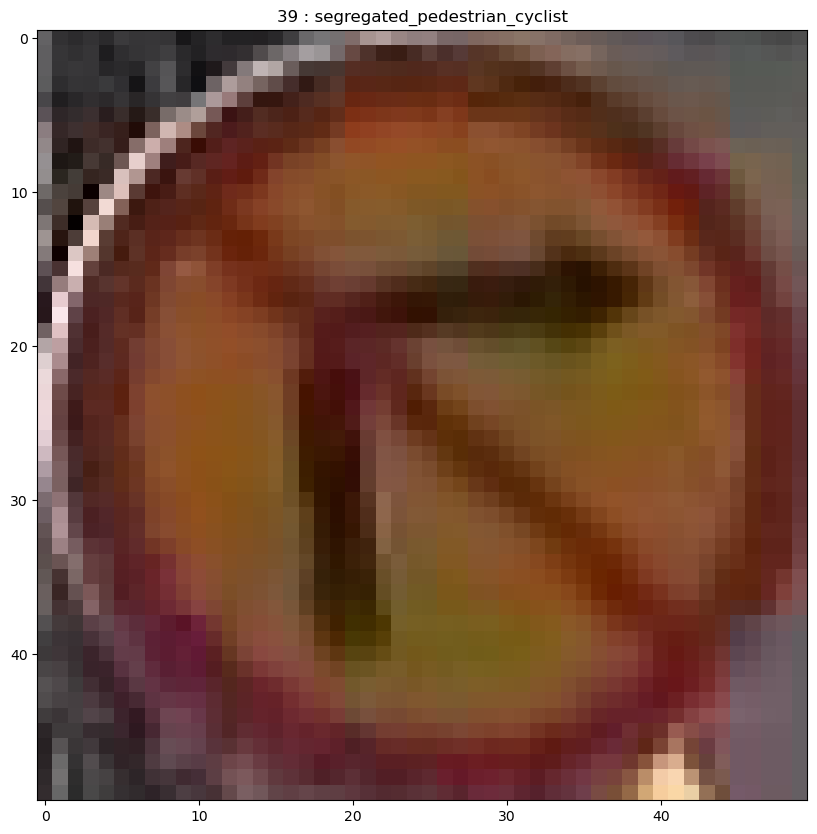

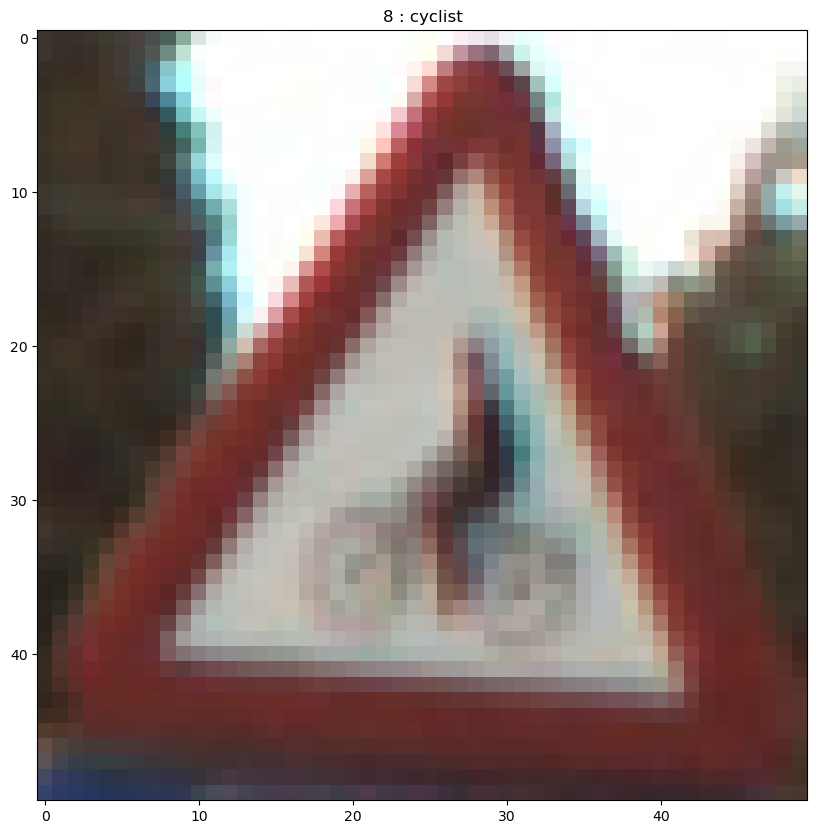

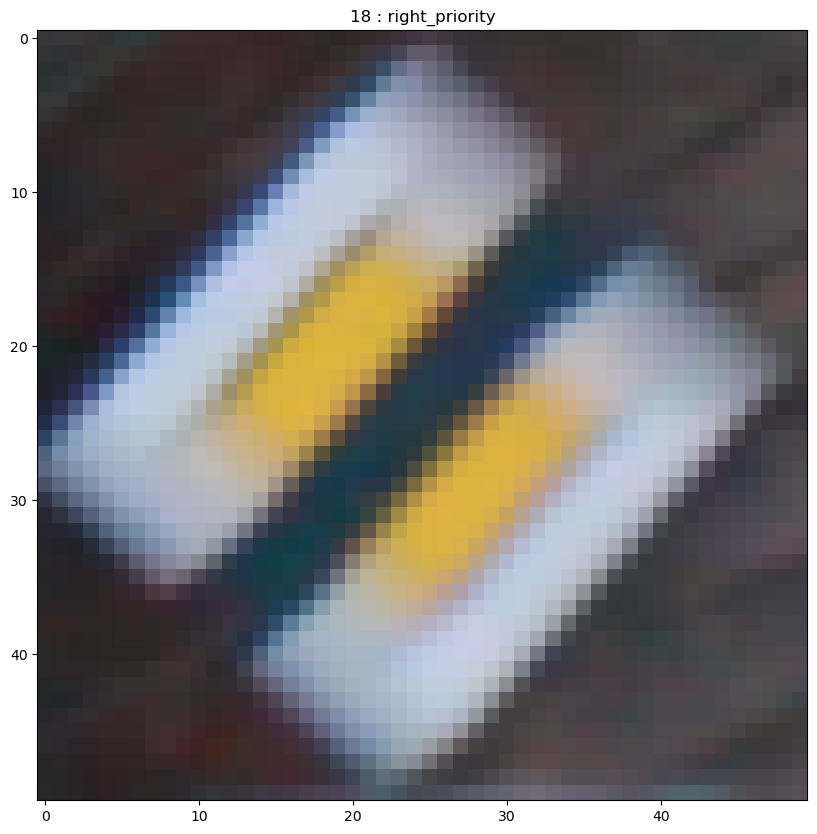

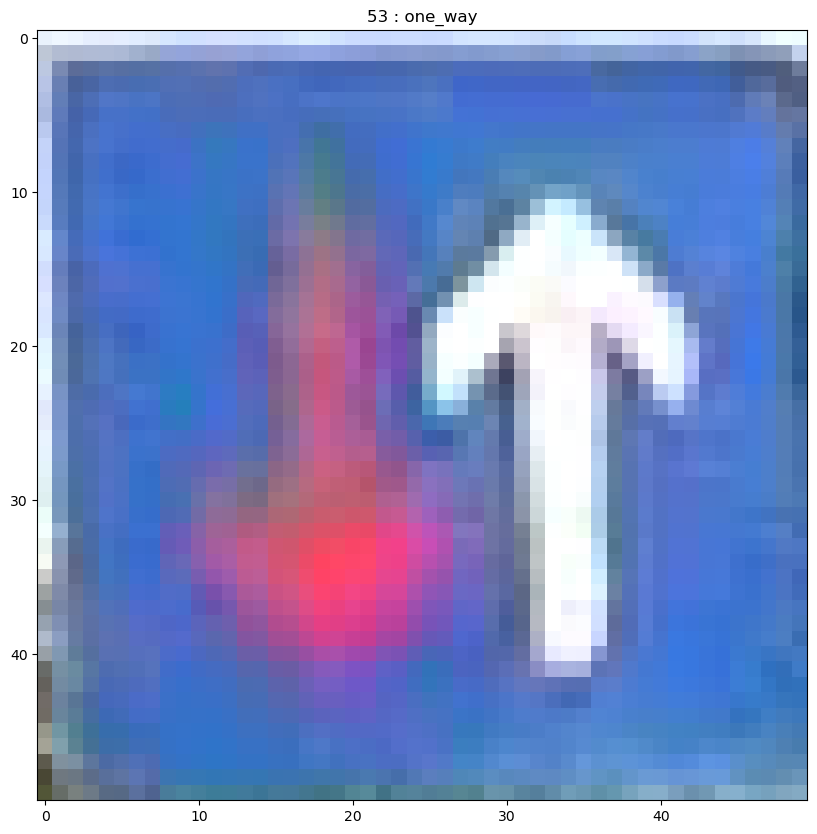

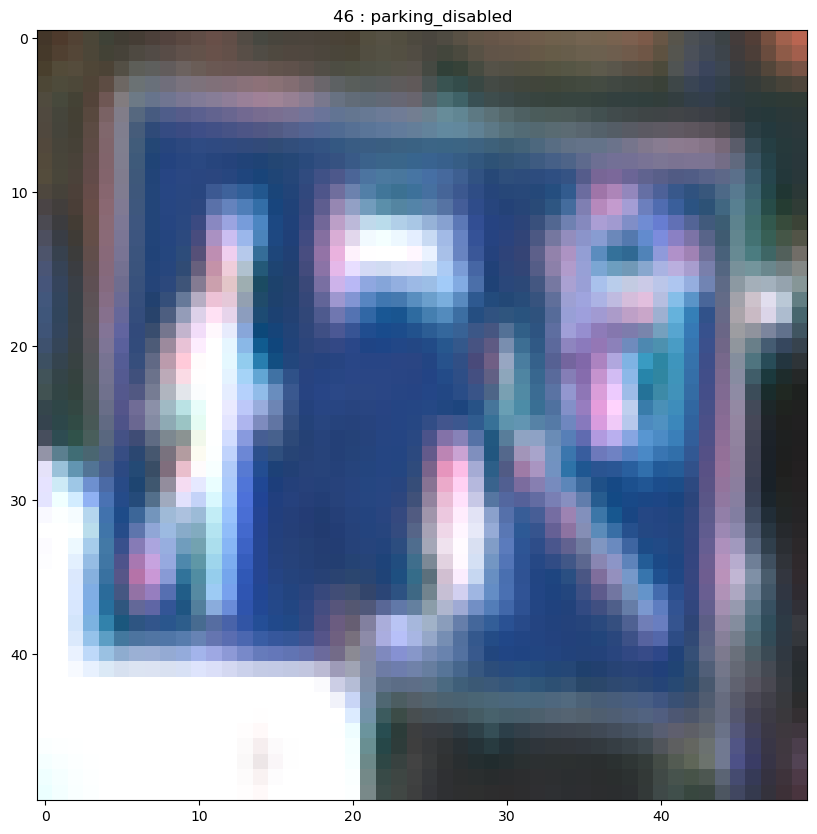

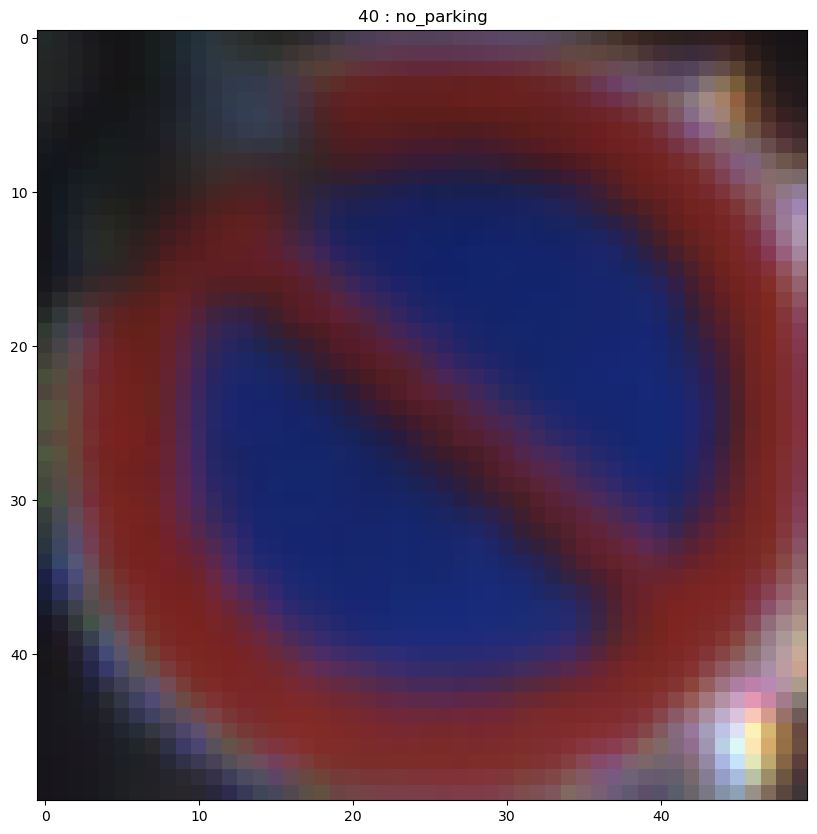

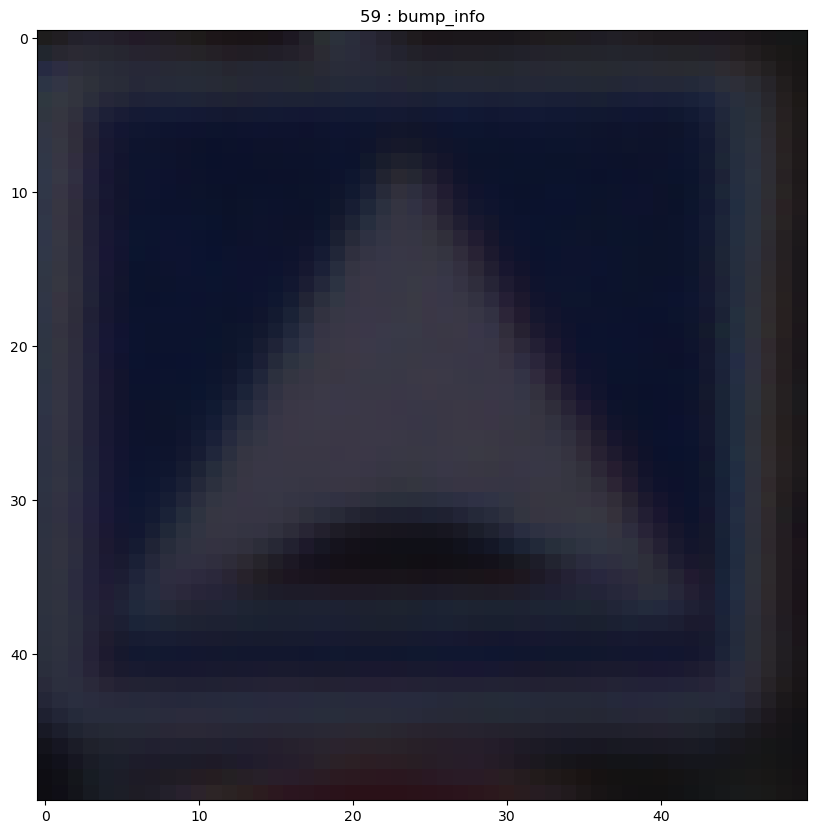

In [23]:
from matplotlib.pyplot import figure, show, title, imshow 
from csv import DictWriter

# We then print the image with num and the sign predicted as a title 

predictions = model_second.predict(images).argmax(axis=1) 

for i in range(20): 
    figure(figsize = (10,10))
    imshow(images[i])
    sign = data[str(predictions[i])]
    title(str(predictions[i]) + " : " + str(sign))

# Here is the code to write the results in a CSV for kaggle 

with open('final' + '.csv', 'w', newline='') as csvfile:
    fieldnames = ['Id', 'Category']
    writer = DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(predictions)): 
        writer.writerow({'Id' : names[i], 'Category' : predictions[i]})